In [320]:
#Datan muotoilua
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_excel('http://taanila.fi/data1.xlsx', sheet_name='Data')
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [321]:
for var in df:
    print(var, pd.unique(df[var]))


nro [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82]
sukup [1 2]
ikä [38 29 30 36 24 31 49 55 40 33 39 35 58 53 42 26 47 44 43 56 21 45 59 37
 28 50 32 51 22 34 27 41 25 61 20 52 46]
perhe [1 2]
koulutus [ 1.  2.  3.  4. nan]
palveluv [22. 10.  7. 14.  4. 16.  0. 23. 21. 15. 12.  2. 17. 20. 13. 27.  1.  3.
 nan 24.  5.  9.  6. 35. 28. 18. 36. 19.  8.]
palkka [3587 2963 1989 2144 2183 1910 2066 2768 2106 2651 2846 2808 3393 2691
 5225 2729 2925 2457 4874 3510 4446 1521 2223 1949 2340 6278 1559 2027
 2300 2534 1872 2261 2417 3119 2574 1715 5069 2495 3470 1598 1638 2612]
johto [3 1 2 4 5]
työtov [ 3.  5.  4.  2. nan]
työymp [3 2 1 5 4]
palkkat [3 1 2 4 5]
työteht [3 2 4 1 5]
työterv [nan  1.]
lomaosa [nan  1.]
kuntosa [nan  1.]
hieroja [nan  1.]


In [322]:
df.rename(columns = {'palkka' : 'palkkaluokka', 'palveluv' : 'palveluvuodet'}, inplace=True)
df.head ()

,nro,sukup,ikä,perhe,koulutus,palveluvuodet,palkkaluokka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [323]:
bins = [1500, 2500, 3500, 4500, 5500, 6500]
df['palkkaluokka'] = pd.cut(df['palkkaluokka'], bins=bins)
bins = [0, 5, 10, 15, 20, 25, 30, 40]
df['palveluvuodet'] = pd.cut(df['palveluvuodet'], bins=bins)
df.head ()

,nro,sukup,ikä,perhe,koulutus,palveluvuodet,palkkaluokka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,"(20, 25]","(3500, 4500]",3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,"(5, 10]","(2500, 3500]",1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,"(5, 10]","(1500, 2500]",3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,"(10, 15]","(1500, 2500]",3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,"(0, 5]","(1500, 2500]",2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [324]:
df[['palkkaluokka','palveluvuodet']].sort_values(by='palkkaluokka', ascending=False).head(10)

,palkkaluokka,palveluvuodet
32,"(5500, 6500]","(10, 15]"
16,"(4500, 5500]","(0, 5]"
21,"(4500, 5500]","(15, 20]"
66,"(4500, 5500]","(5, 10]"
0,"(3500, 4500]","(20, 25]"
23,"(3500, 4500]","(5, 10]"
22,"(3500, 4500]","(25, 30]"
68,"(3500, 4500]","(0, 5]"
13,"(3500, 4500]","(20, 25]"
14,"(2500, 3500]","(10, 15]"


In [325]:
#Lukumäärien ja prosenttien laskenta
palkkaluokka = ['1500', '2500', '3500', '4500', '5500']
palveluvuodet = ['0-4v', '5-9v', '10-14v', '15-19v', '20-24v', '25-29v', '30+v']

In [326]:
df1 = pd.crosstab(df['palkkaluokka'], 'n')
df1.index = palkkaluokka
df1.columns.name = 'palkkaluokka'
df1

palkkaluokka,n
1500,47
2500,26
3500,5
4500,3
5500,1


In [327]:
df2 = pd.crosstab(df['palveluvuodet'], df['palkkaluokka'], normalize = 'columns')
df2.index = palveluvuodet
df2.columns.name = ''
df2.style.format('{:.1%}')

,"(1500, 2500]","(2500, 3500]","(3500, 4500]","(4500, 5500]","(5500, 6500]"
0-4v,35.7%,4.0%,20.0%,33.3%,0.0%
5-9v,21.4%,20.0%,20.0%,33.3%,0.0%
10-14v,19.0%,8.0%,0.0%,0.0%,100.0%
15-19v,16.7%,28.0%,0.0%,33.3%,0.0%
20-24v,4.8%,32.0%,40.0%,0.0%,0.0%
25-29v,2.4%,0.0%,20.0%,0.0%,0.0%
30+v,0.0%,8.0%,0.0%,0.0%,0.0%


[Text(0, 0, '0%'),
 Text(0, 0, '20%'),
 Text(0, 0, '40%'),
 Text(0, 0, '60%'),
 Text(0, 0, '80%'),
 Text(0, 0, '100%'),
 Text(0, 0, '120%')]

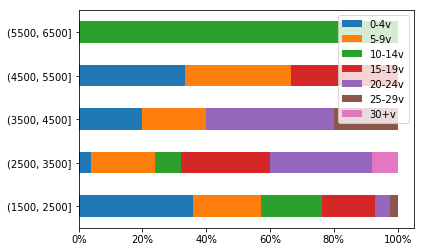

In [328]:
ax = df2.transpose().plot.barh(stacked = True,)
vals = ax.get_xticks()
ax.set_xticklabels(['{:.0%}'.format(x) for x in vals])

<b><u><i>Vaakapylväissä laskettu palvelusvuosien jakautuminen palkkaluokkiin. Oliosta näemme, että palvelusvuodet eivät suoraan korreloidu palkkaan.  <i><u><b>